In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.regression.linear_model as lm

# EDA

In [3]:
df02 = pd.read_csv('./data/vHoneyNeonic_v02.csv')
df03 = pd.read_csv('./data/vHoneyNeonic_v03.csv')

In [4]:
df02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          825 non-null    object 
 1   numcol         825 non-null    float64
 2   yieldpercol    825 non-null    int64  
 3   totalprod      825 non-null    float64
 4   stocks         825 non-null    float64
 5   priceperlb     825 non-null    float64
 6   prodvalue      825 non-null    float64
 7   year           825 non-null    int64  
 8   StateName      825 non-null    object 
 9   Region         825 non-null    object 
 10  nCLOTHIANIDIN  761 non-null    float64
 11  nIMIDACLOPRID  761 non-null    float64
 12  nTHIAMETHOXAM  761 non-null    float64
 13  nACETAMIPRID   761 non-null    float64
 14  nTHIACLOPRID   761 non-null    float64
 15  nAllNeonic     761 non-null    float64
dtypes: float64(11), int64(2), object(3)
memory usage: 103.2+ KB


In [5]:
df03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          1132 non-null   object 
 1   numcol         1132 non-null   float64
 2   yieldpercol    1132 non-null   int64  
 3   totalprod      1132 non-null   float64
 4   stocks         1132 non-null   float64
 5   priceperlb     1132 non-null   float64
 6   prodvalue      1132 non-null   float64
 7   year           1132 non-null   int64  
 8   StateName      1132 non-null   object 
 9   Region         1132 non-null   object 
 10  FIPS           1132 non-null   int64  
 11  nCLOTHIANIDIN  895 non-null    float64
 12  nIMIDACLOPRID  895 non-null    float64
 13  nTHIAMETHOXAM  895 non-null    float64
 14  nACETAMIPRID   895 non-null    float64
 15  nTHIACLOPRID   895 non-null    float64
 16  nAllNeonic     895 non-null    float64
dtypes: float64(11), int64(3), object(3)
memory usage: 15

- Let's check if df02 and df03 both are different.

In [6]:
print(np.sort(df02['year'].unique()))
print(np.sort(df03['year'].unique()))

[1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017]
[1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


In [7]:
print(df02.shape, df03.shape)

(825, 16) (1132, 17)


Just need to work with df03 (VHoneyNeonic_v03.csv)

nCLOTHIANIDIN    237
nIMIDACLOPRID    237
nTHIAMETHOXAM    237
nACETAMIPRID     237
nTHIACLOPRID     237
nAllNeonic       237
dtype: int64


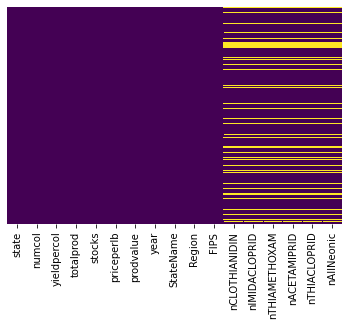

In [8]:
# fig = go.Figure([go.Bar(
#                 x=df03.isnull().sum().index, 
#                 y=df03.isnull().sum())
#                 ])
# fig.update_layout(title='NaN values by column. Total 237 for chemical', width=400)
# fig.show()
# print(df03.isna().sum())
# for all chemicals, there is some NAs
sns.heatmap(df03.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print(df03.isna().sum()[df03.isna().sum() > 0])

For all neonics we have a lot of NAN. Fortunaly, plotly manage NAN values for us.

In [9]:
# sort the entire df for future use
df = df03.sort_values(['StateName','year'],ascending=True)

In [10]:
df.corr()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
numcol,1.000000,0.241379,0.952677,0.809360,-0.187786,0.873836,0.004369,-0.103073,0.022015,0.409895,0.092107,0.318224,-0.032633,0.189996
yieldpercol,0.241379,1.000000,0.396507,0.352407,-0.337930,0.239500,-0.215072,-0.109588,-0.048182,-0.081020,0.021389,-0.116265,-0.105431,-0.058936
totalprod,0.952677,0.396507,1.000000,0.851490,-0.220494,0.853131,-0.060457,-0.064675,0.002455,0.274404,0.068303,0.165876,-0.055876,0.118631
stocks,0.809360,0.352407,0.851490,1.000000,-0.224134,0.711388,-0.046603,0.036676,0.001051,0.160943,0.029506,0.114871,-0.019246,0.068194
priceperlb,-0.187786,-0.337930,-0.220494,-0.224134,1.000000,-0.003350,0.764124,0.082300,0.262087,0.198470,0.261383,0.041519,0.109933,0.279994
prodvalue,0.873836,0.239500,0.853131,0.711388,-0.003350,1.000000,0.215962,-0.024985,0.104103,0.357058,0.215125,0.217413,-0.007690,0.240381
year,0.004369,-0.215072,-0.060457,-0.046603,0.764124,0.215962,1.000000,-0.007667,0.315925,0.354881,0.467843,0.169439,0.179026,0.415524
FIPS,-0.103073,-0.109588,-0.064675,0.036676,0.082300,-0.024985,-0.007667,1.000000,-0.081233,-0.264478,-0.085272,-0.084765,0.142158,-0.160150
nCLOTHIANIDIN,0.022015,-0.048182,0.002455,0.001051,0.262087,0.104103,0.315925,-0.081233,1.000000,0.510284,0.750403,0.019093,-0.009031,0.920872
nIMIDACLOPRID,0.409895,-0.081020,0.274404,0.160943,0.198470,0.357058,0.354881,-0.264478,0.510284,1.000000,0.534640,0.542934,-0.018258,0.784714


In [11]:
#sns.pairplot(df[["numcol","year","totalprod", "nCLOTHIANIDIN", "nIMIDACLOPRID", "nTHIAMETHOXAM","nACETAMIPRID",	"nTHIACLOPRID",	"nAllNeonic"]])

In [12]:
# df_filter = df.groupby('year').agg(numcol = ('numcol', sum), prod = ('totalprod', sum) ,neoc = ('nAllNeonic', sum))

# fig = make_subplots(
#             rows=2, 
#             cols=2, 
#             specs=[[{}, {}],[{"colspan": 2}, None]],
#             subplot_titles=("Number of colonies","Producion", "Neocotinoids usage (kg)")
# )
# fig.add_trace(
#     go.Scatter(x=df_filter.index, y=df_filter['numcol']),
#     row=1, col=1
# )
# fig.add_trace(
#     go.Scatter(x=df_filter.index, y=df_filter['prod']),
#     row=1, col=2
# )
# fig.add_trace(
#     go.Scatter(x=df_filter.index, y=df_filter['neoc']),
#     row=2, col=1
# )
# fig.update_layout(showlegend=False, title_text="Specs with Subplot Title")
# fig.show()

In [13]:
df_filter = df.groupby('year').agg(numcol = ('numcol', sum), prod = ('totalprod', sum) ,neoc = ('nAllNeonic', sum))
result = df_filter.to_json(orient="split")
parsed = json.loads(result)
json.dumps(parsed) 

'{"columns": ["numcol", "prod", "neoc"], "index": [1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], "data": [[3169000.0, 218883000.0, 0.0], [3021000.0, 220349000.0, 0.0], [2868000.0, 230444000.0, 0.0], [2764000.0, 216968000.0, 11207.2], [2640000.0, 210278000.0, 82134.0], [2558000.0, 197908000.0, 101002.5], [2617000.0, 195303000.0, 185898.7], [2621000.0, 219519000.0, 166324.4], [2637000.0, 202387000.0, 140227.8], [2604000.0, 219558000.0, 133949.2], [2542000.0, 185748000.0, 143690.4], [2565000.0, 171265000.0, 168746.2], [2591000.0, 181372000.0, 203264.0], [2539000.0, 182729000.0, 604129.3], [2394000.0, 173969000.0, 725936.4], [2378000.0, 154238000.0, 784637.7], [2428000.0, 147621000.0, 1039977.8], [2326000.0, 162972000.0, 1225943.7], [2472000.0, 145068000.0, 1467880.1], [2666000.0, 175294000.0, 1708859.8], [2466000.0, 147201000.0, 2247466.3], [2509000.0, 140907000.0, 2732574.

In [14]:
# import json
# df = pd.DataFrame(
#     [["a", "b"], ["c", "d"]],
#     index=["row 1", "row 2"],
#     columns=["col 1", "col 2"],
# )
# result = df.to_json(orient="split")
# parsed = json.loads(result)
# json.dumps(parsed) 

In [15]:
df_filter = df.groupby('year').agg(numcol = ('numcol', sum), prod = ('totalprod', sum) ,neoc = ('nAllNeonic', sum))

fig = make_subplots(
            rows=3, cols=1, 
            specs=[[{}], [{}], [{}]],
            subplot_titles=("Number of colonies","Production", "Neocotinoids usage (kg)")
)
fig.add_trace(
    go.Scatter(x=df_filter.index, y=df_filter['numcol']),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=df_filter.index, y=df_filter['prod']),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=df_filter.index, y=df_filter['neoc']),
    row=3, col=1
)
fig.update_layout(
    showlegend=False, 
    title_text="Specs with Subplot Title",     
    autosize=False,
    width=600,
    height=600,)
fig.show()


The trred is clear, from 1991 to 2014, the usage of neonics has increased dramatically. It's not the case for the number of colonies. In 1991 there was 3.17 million of colonies for the entire nation, but in 2014 there was 2.7 million of colonies. Production is not different. From 1991 the production was 220.3 million. In 2014 it reached 176.8 million. Certainly, seems to be a relashionship between the usage of neonics and the decrease in production and the number of colonies overall.

However, a second look shows that there is no clear relashionship, since in 1994 the usage of neonics started, but the number of colonies and production already were declining. At least this dataset doesn't show a good correlation. 
Let's better take a look the states separately and the regions to dive deeper.   

In [16]:
from plotly.subplots import make_subplots

labels = df.StateName
values1 = df.numcol
values2 = df.totalprod
values3 = df.nAllNeonic

# fig = make_subplots(
            # rows=3, cols=1, 
            # specs=[[{}], [{}], [{}]],
            # subplot_titles=("Number of colonies","Production", "Neocotinoids usage (kg)")

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, 
                specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
                subplot_titles=("Number of colonies","Production", "Neocotinoids usage (kg)"))
fig.add_trace(go.Pie(labels=labels, values=values1, name="Colonies"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values2, name="Production"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=values3, name="Neo"),
              1, 3)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_traces(textposition='inside', textfont_size=14)
fig.update_layout(
    title_text="Number of colonies and production: Summary 1990-2017",
    # Add annotations in the center of the donut pies.
    # annotations=[dict(text='Colonies', x=0.10, y=0.5, font_size=20, showarrow=False),
    #               dict(text='Production', x=0.5, y=0.5, font_size=20, showarrow=False),
    #               dict(text='Neo', x=0.85, y=0.5, font_size=20, showarrow=False)],
                 
    showlegend=True,   
    autosize=False,
    width=1200,
    height=500,)
fig.show()

The state with largest amount of colonies is California, North Dakota, South Dakota, Florida, Minessota and Montana. Curiosly, North Dakota is first in production, then California, South Dakota, Florida, Montana and Minnesota. However, the states with more usage of neocotinoids are California, Illinous, Iowa, Minnessota and Nebraska. 

In [17]:
import json
result = df.to_json(orient="split")
parsed = json.loads(result)
#json.dumps(parsed) 

with open(f'data/dataset.json', 'w') as f:
    json.dump(parsed, f)

In [18]:
# filtering per year

year = 2014
df_year = df.query(f"year == {year}")

labels = df_year.StateName
values1 = df_year.numcol
values2 = df_year.totalprod
values3 = df_year.nAllNeonic

# Create subplots: use 'domain' type for Pie subplot

fig = make_subplots(rows=1, cols=3, 
                specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
                subplot_titles=("Number of colonies","Production", "Neocotinoids usage (kg)"))

fig.add_trace(go.Pie(labels=labels, values=values1, name="Colonies"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values2, name="Production"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=values3, name="Neo"),
              1, 3)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_traces(textposition='inside', textfont_size=14)
fig.update_layout(
    title_text=f"Number of colonies and production: Summary {year}",            
    showlegend=True,   
    autosize=False,
    width=1200,
    height=500,)
fig.show()

In [19]:
year = 2014
df_year = df.query(f"year == {year}")

labels = df_year.StateName
values1 = df_year.numcol
values2 = df_year.totalprod
values3 = df_year.nAllNeonic

# By region

In [20]:
df['Region'].unique()

array(['South', 'West', 'Midwest', 'Northeast'], dtype=object)

In [21]:
year = 2017
region = 'South'
df_rg = df.query(f"year == {year}").query(f"Region == '{region}'")
fig = px.pie(df_rg, values='numcol', names='StateName', title=f'Number of colonies in the {region} region for {year}')
fig.update_layout(
    showlegend=True, 
    title_text="Specs with Subplot Title",     
    autosize=False,
    width=600,
    height=600,)
fig.show()

In [22]:
region = 'West' # 'South', 'West', 'Midwest', 'Northeast'
neo = 'nCLOTHIANIDIN' # nCLOTHIANIDIN	nIMIDACLOPRID	nTHIAMETHOXAM	nACETAMIPRID	nTHIACLOPRID	nAllNeonic

df_rg = df.query(f"Region == '{region}'")
fig = px.line(df_rg, x='year', y=f'{neo}', color='StateName')
fig.update_layout(
    showlegend=True, 
    title_text=f"Neonics usage for the {region} region",     
    autosize=False,
    width=800,
    height=600,)
fig.show()

Let's take a look to California, Dakotas, Florida, Illions, Iowa and Minessota. Very interesting case for Minessota and California. 

In [23]:
state = 'Florida' # California, North Dakota and South Dakota, Florida, Minessota and Montana, California, South Dakota, Florida, Montana and Minnesota
                # California, Illinous, Iowa, Minnessota and Nebraska
neo = 'nAllNeonic' # nCLOTHIANIDIN	nIMIDACLOPRID	nTHIAMETHOXAM	nACETAMIPRID	nTHIACLOPRID	nAllNeonic
df_state = df.query(f"StateName == '{state}'")
neonics = df_state.iloc[:,-6:-1].sum()

if neo == 'nAllNeonic':
    neo_name = 'All neonics combined'
else:
    neo_name = neo

In [24]:
fig = make_subplots(
    rows=3, cols=2,
    specs=[[{}, {"type": "domain"}], [{}, {"type": "xy"}], [{}, {}]],
    subplot_titles=(f"Number of colonies","Neocotinoids % usage", f"{neo_name} usage (kg) over years", "Honey yield per colony (kg)", "Production")
)

fig.add_trace(go.Scatter(x=df_state.year, y=df_state.numcol), row=1, col=1)
fig.add_trace(go.Pie(values=neonics.values, labels=neonics.index), row=1, col=2)
fig.add_trace(go.Scatter(x=df_state.year, y=df_state[f'{neo}']), row=2, col=1)
fig.add_trace(go.Bar(y=df_state.yieldpercol, x=df_state.year), row=2, col=2)
fig.add_trace(go.Scatter(x=df_state.year, y=df_state.totalprod), row=3, col=1)

fig.update_layout(
    showlegend=False, 
    title_text=f"Information for {state} (1991 to 2017)",  
    autosize=False,
    width=1200,
    height=800,)


fig.show()

In [25]:
fig = px.scatter(
    df_state, x='numcol', y=f'{neo}', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)

fig.update_layout(
    showlegend=False, 
    title_text=f"Information for {state} (1991 to 2017)",  
    autosize=False,
    width=500,
    height=350,)

fig.show()

# Generate info fot testing fetch

In [26]:
region = 'West' # 'South', 'West', 'Midwest', 'Northeast'
neo = 'nCLOTHIANIDIN' # nCLOTHIANIDIN	nIMIDACLOPRID	nTHIAMETHOXAM	nACETAMIPRID	nTHIACLOPRID	nAllNeonic

df_rg_west = df.query(f"Region == '{region}'")
fig = px.line(df_rg, x='year', y=f'{neo}', color='StateName')
fig.update_layout(
    showlegend=True, 
    title_text=f"Neonics usage for the {region} region",     
    autosize=False,
    width=800,
    height=600,)
fig.show()

In [27]:
df_rg_west

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
60,AZ,75000.0,50,3750000.0,750000.0,0.53,1988000.0,1991,Arizona,West,4,NaN,NaN,NaN,NaN,NaN,NaN
59,AZ,70000.0,54,3780000.0,1285000.0,0.55,2079000.0,1992,Arizona,West,4,NaN,NaN,NaN,NaN,NaN,NaN
58,AZ,55000.0,77,4235000.0,932000.0,0.52,2202000.0,1993,Arizona,West,4,NaN,NaN,NaN,NaN,NaN,NaN
56,AZ,47000.0,59,2773000.0,166000.0,0.51,1414000.0,1994,Arizona,West,4,0.0,2653.2,0.0,0.0,0.0,2653.2
57,AZ,52000.0,79,4108000.0,986000.0,0.65,2670000.0,1995,Arizona,West,4,0.0,8260.6,0.0,0.0,0.0,8260.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,WY,47000.0,66,3102000.0,558000.0,2.11,6545000.0,2013,Wyoming,West,56,840.9,155.9,526.2,0.0,0.0,1523.0
1116,WY,38000.0,61,2318000.0,255000.0,2.08,4821000.0,2014,Wyoming,West,56,1262.0,258.2,566.1,0.0,0.0,2086.3
1118,WY,38000.0,77,2926000.0,146000.0,1.90,5559000.0,2015,Wyoming,West,56,0.0,114.4,19.0,0.0,0.0,133.4
1127,WY,40000.0,68,2720000.0,190000.0,1.78,4842000.0,2016,Wyoming,West,56,0.0,27.5,9.4,0.0,0.0,36.9


In [28]:
region = 'West' # 'South', 'West', 'Midwest', 'Northeast'
neo = 'nCLOTHIANIDIN' # nCLOTHIANIDIN	nIMIDACLOPRID	nTHIAMETHOXAM	nACETAMIPRID	nTHIACLOPRID	nAllNeonic

df_region = df.query(f"Region == '{region}'")[['StateName', 'nCLOTHIANIDIN',	'nIMIDACLOPRID',	'nTHIAMETHOXAM',	'nACETAMIPRID',	'nTHIACLOPRID',	'nAllNeonic']]

In [29]:
# filter information
years = df['year'].unique().tolist() # years
states = df_region['StateName'].value_counts().index.tolist() # states for a region
regions = regions = df['Region'].unique().tolist()
neonics = df.columns[11:].tolist()

In [43]:
neo = 'nCLOTHIANIDIN'


def makedict(region, neo):
    # thedict = {'region': f'{region}', 'neonic': f'{neo}', 'states_metrics': [], 'years': f'{years}'}
    years = df['year'].unique().tolist() # years
    thedict = {'states_metrics': [], 'years': f'{years}'}
    df_ = df[['StateName', 'Region', f'{neo}']].query(f"Region == '{region}'").replace(np.nan, 'null')
    states = df_['StateName'].value_counts().index.tolist()
    thedict['region'] = region
    thedict['states'] = states
    thedict['neonic'] = neo
    for statename in df_['StateName'].value_counts().index.tolist():
        df_filtered = df_.query(f"StateName == '{statename}'")
        thedict['states_metrics'].append({f'{statename}': df_filtered[f'{neo}'].tolist()})
    return thedict


In [44]:
thedict = makedict('West', 'nCLOTHIANIDIN')

In [45]:
import json

result = json.dumps(thedict)
#parsed = json.loads(result)

with open(f'data/dataset1.json', 'w') as f:
   json.dump(result, f)

In [39]:
import json
result = df.to_json(orient="split")
print(type(result))
parsed = json.loads(result)
print(type(parsed))

with open(f'data/dataset2.json', 'w') as f:
   json.dump(parsed, f)

<class 'str'>
<class 'dict'>


In [34]:
import json
result = df.to_json(orient="split")
print(type(result))
parsed = json.loads(result)
print(type(parsed))

with open(f'data/dataset3.json', 'w') as f:
   json.dump(parsed, f)

<class 'dict'>
